# Scrapping and analysing animebracket data

Notebook to scrap contests from AnimeBracket and running some analysis on the data. For this I will use contests run in **r/OtomeIsekai**


In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup

First scrapping it, coberting to JSON and the storing on a list

In [2]:
url=r'https://animebracket.com/results/otome-isekai-best-character?group=full'

html = urlopen(url)
bs = BeautifulSoup(html, 'html.parser')

a=bs.find('script', {"type":"text/javascript"})
b=a.text.split('=')

data1 = json.loads(b[1][:-6])
url=r'https://animebracket.com/results/otome-isekai-best-guy?group=full'

html = urlopen(url)
bs = BeautifulSoup(html, 'html.parser')

a=bs.find('script', {"type":"text/javascript"})
b=a.text.split('=')

data2 = json.loads(b[1][:-6])

url=r'https://animebracket.com/results/otome-isekai-villains-you-love-to-hate-2021?group=full'

html = urlopen(url)
bs = BeautifulSoup(html, 'html.parser')
a=bs.find('script', {"type":"text/javascript"})
b=a.text.split('=')
data3 = json.loads(b[1][:-6])

url=r'https://animebracket.com/results/otome-isekai--best-couple-2021?group=full'

html = urlopen(url)
bs = BeautifulSoup(html, 'html.parser')
a=bs.find('script', {"type":"text/javascript"})
b=a.text.split('=')
data4 = json.loads(b[1][:-6])

url=r'https://animebracket.com/results/otome-isekai-best-character-2--beware-the-saltiness?group=full'

html = urlopen(url)
bs = BeautifulSoup(html, 'html.parser')
a=bs.find('script', {"type":"text/javascript"})
b=a.text.split('=')
data5 = json.loads(b[1][:-6])

data=[[data1,'Best character'],[data2,'Best ML'],[data3,'Best antagonist'],
      [data4,'Best couple'],[data5,'Best character 2']]


Extracting the data on the list and put it on a Dataframe

In [3]:

result=data2['results']
type(result[1][0])
X=[]
for k in data:
    for i in k[0]['results']:
        try:
            for j in i:
                if 'votes' in j['character1'].keys():
                    list_char=[k[1],j['tier'],j['character1']['id'],j['character1']['name'],j['character1']['source'],j['character1']['seed'],j['character1']['votes'],
                               j['character2']['id'],j['character2']['name'],j['character2']['source'],j['character2']['seed'],j['character2']['votes']]
                else:
                    list_char=[k[1],j['tier'],j['character1']['id'],j['character1']['name'],j['character1']['source'],j['character1']['seed'],np.nan,
                               j['character2']['id'],j['character2']['name'],j['character2']['source'],j['character2']['seed'],np.nan]
                X.append(list_char)
        except:
            print('Stopped in tier: ' +  str(j['tier']))
            break

data_DF=pd.DataFrame(X,columns=['contest','tier','char1_ID','char1_name','char1_source','char1_seed','char1_votes','char2_ID','char2_name','char2_source','char2_seed','char2_votes'])
#The data has a quirk, char1 is the character on the top bracket and char2 is the character on the lower bracket.
#It usually leads to char1 having a higher seed than char2

data_DF['seed difference']=data_DF['char2_seed']-data_DF['char1_seed']
data_DF['vote difference']=(data_DF['char1_votes']-data_DF['char2_votes'])*np.sign(data_DF['seed difference'])
#np.sign(data_DF['seed difference']) assures the vote difference will be between the higher and lower seed
data_DF['seed difference']=np.abs(data_DF['seed difference'])
#np.abs(data_DF['diff_seed']) makes sure the seed difference is between the higher and lower seed
data_DF['upset']=data_DF['vote difference']<0




Stopped in tier: 5


Generate plots

[0.25, 0.125, 0.25]

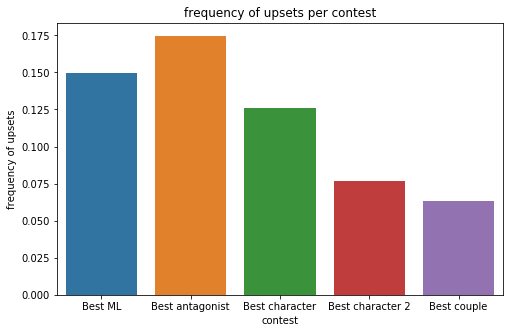

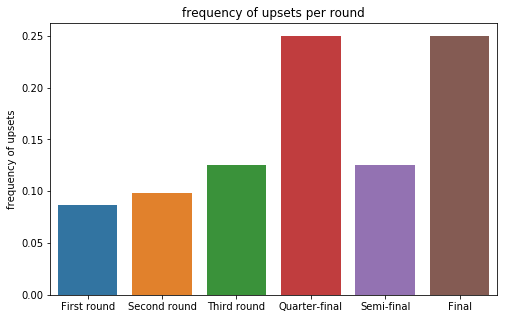

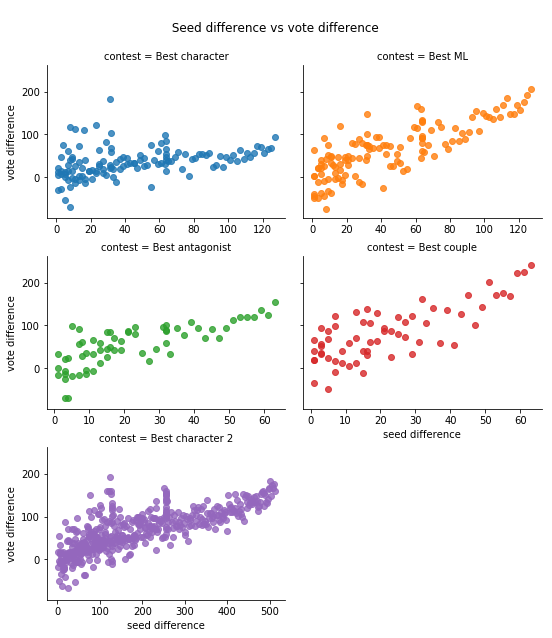

In [4]:
gp=data_DF.groupby(by='contest')
k=gp.mean()
plt.figure(figsize=(8,5));sns.barplot(x=k.index, y="upset", data=k)
plt.ylabel('frequency of upsets')
plt.title('frequency of upsets per contest')
plt.savefig('plot_analise_upsets.png',dpi=300)

gp=data_DF.groupby(by=['tier'])
kk=gp.mean()['upset']

pertier=np.zeros(6)
pertier[:3]=kk.iloc[:3]
pertier[3:]=[0.25,0.125,0.25] #Did this analysis by hand
rounds=['First round','Second round','Third round','Quarter-final','Semi-final','Final']
tier_DF=pd.DataFrame(pertier,index=rounds,columns=['upset'])
plt.figure(figsize=(8,5));sns.barplot(x=tier_DF.index,y='upset',  data=tier_DF)
plt.ylabel('frequency of upsets')
plt.title('frequency of upsets per round')
plt.savefig('plot_analise_upsets_tier.png',dpi=300)


g=sns.lmplot(x='seed difference',y='vote difference',data=data_DF,hue='contest',
           col="contest", sharex=False, col_wrap=2, fit_reg=False,height=3,aspect=1.3)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.89)
g.fig.suptitle('\n Seed difference vs vote difference \n')
plt.savefig('plot_analise_vote_dif.png',dpi=300)
[0.25,0.125,0.25]
